In [1]:
import os
import sys
import traceback
from dipy.tracking import utils

import nibabel as nib
import numpy as np
from nibabel import trackvis
from responsestuff.responsestuff.autoresponse import fskeys
import scipy
import json
import matplotlib.pyplot as plt 
from dipy.tracking.streamline import length

In [2]:
subjid = 100206
config_path = open("config.json")
config_dict = dict(json.load(config_path))
track_dir = config_dict["track_dir"] 
label_dir = config_dict["label_dir"]
streamline_file = "{}/{}/prob-localtrack-clean.trk".format(track_dir, subjid)
label_file = "{}/{}/aseg_to_fa_aff.nii.gz".format(label_dir, subjid)

save_dir = config_dict["save_dir"]
save_file = "{}/{}/network/network_multiplicities.json".format(save_dir, subjid)

In [3]:
# extracting data from the files 

trk, hdr = trackvis.read(streamline_file)
streamlines = [i[0] for i in trk] # takes the streamlines of each item of (trk)?
trk_save = [(i, None, None) for i in streamlines] # array of streamline tuples (why is this necessary) 
assert str(hdr['voxel_order']).lower() == "las" # takes voxel_order, turns all letters to lower case and then compares it to (las)?
vs = hdr['voxel_size'] # vs = some list of arrays (have no idea what each accronym means)
aff = np.diag([vs[0], vs[1], vs[2], 1]) # construct a diagonal array (why?)
aff[:, 3] = np.dot(aff, [.5, .5, .5, 1]) # dot product of the diagonal and the vector (transformation half the size? not sure of the notation)

In [4]:
# gets all data related to the cortex

ctx_array = fskeys['ctx'] # labels that belong to the cerebral cortex
deep_grey_array = fskeys['deep gray'] # labels that belong to grey matter

aseg = nib.load(label_file).get_data() # array of content
gray_region = (np.in1d(aseg, fskeys['ctx']) | #compares the cortex file to the deep gray file?
               np.in1d(aseg, fskeys['deep gray'])) # checks to see if elements in first array are in the second array [booleans]
gray_region.shape = aseg.shape # "unlinearize": convert linear to 3D shape ? makes them the same shape (aka matrix dimension)
aseg_grey = aseg * gray_region # mask all non-grey matter regions in this mapping 

In [5]:
# getting the labels and gray values 

labels, lt = utils.reduce_labels(aseg_grey) #Reduces an array to the integers from 0 to n with smallest possible aseg_gray
                                            #(first) array of matrixes?????? 
                                            #(second) new array 
        
mat, mapping = utils.connectivity_matrix(streamlines, labels,
                                             affine=aff,
                                             return_mapping=True,
                                             mapping_as_streamlines=True) #Counts the streamlines that start and end at each label pair. [when retrieving nodes between 2 locations happens] ]
                                                                            #(first) matrix with number of connections between each pair of region; counts between the 2 areas 
                                                                            #(second) mapping[i, j] returns all the streamlines that connect region i to region j; represents a streamline

In [6]:
# print(mat)
print(mapping[(1, 2)][0])

[[ 96.052216 126.20764   70.19251 ]
 [ 96.041664 126.458336  70.625   ]
 [ 96.0869   126.73803   71.03698 ]
 [ 96.17952  127.122696  71.342674]
 [ 96.41764  127.47146   71.610374]
 [ 96.58373  127.925186  71.739006]
 [ 96.67635  128.30986   72.0447  ]
 [ 96.812035 128.64755   72.38755 ]
 [ 96.97812  129.10129   72.516174]]


In [7]:
#

stream_multiplicity_map = {}
for val in mapping:
    modified_key = lt[val[0]], lt[val[1]] # ??
    # print(modified_key, len(mapping[val]))
    stream_multiplicity_map[str(modified_key)] = len(mapping[val]) #sets the key 

save_directory = "{}/{}/network".format(save_dir, subjid)
if not os.path.exists(save_directory): 
    os.makedirs(save_directory)  #Recursive directory creation function; makes all intermediate-level directories needed to contain the leaf directory.
    
f = open(save_file, 'w')
json.dump(stream_multiplicity_map, f) 
f.close()

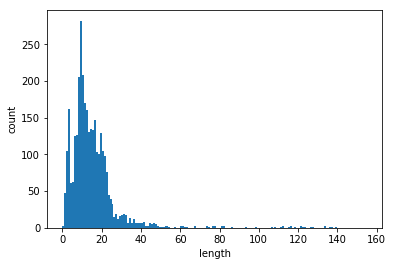

In [8]:
# histogram of lengths 

# 1. take the length of all the streamlines 
# 2. length = distance between each consecutive point added together 
#     con: not all pts are straight...unless these pts are close enough the curve doesnt matter 
# 3. build a histogram length vs amount (# of streamlines )



# lengths  = {}   
# for arr in mapping[(1,2)]:
#     len = int(length(arr))
#     if (lengths.get(len) != None):
#         lengths[len] = lengths.pop(len) + 1
#     else: 
#         lengths[len] = 1



# estimate histogram
lengths  = []
for arr in mapping[(1,2)]:
    len = length(arr)
    lengths += [len]
        
highest_bin = int(np.ceil(max(lengths)))
lowest_bin = int(np.floor(min(lengths)))
plt.hist(lengths, range(lowest_bin, highest_bin))
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [9]:
# take in the streamline and the data from another file (MRi)

# Then we want to normalize it using ANT or FLIRT or FSL and freesurfer? metric_path
# Then along the streamline we want to take the information 
#     if the data is not there then that means that area of the streamline or brain is not functioning 

# take in files so that they are readable
streamline_file = read(streamline_file)
mri_file = read(mri)

# normalize files using ANT?
normalized_streamlines, normalized_mri = normalize(mri_file, streamline_file)

def make_track(normalized_streamline, normalized_mri):
#     save data in an array
    data = []
    
#     for each point in the streamline we want to collect the data from the MRI file that 
#     corresponds to the same point
    for point in normalized_streamline:
        
#         get the data from the normalized mri
        temp = point.get_data(normalized_mri)
    
#         check if the point is valid
        if (!temp)
#             if it is then add to the array
            data += [data]
        else: 
#             if not write corrupted (do we want to have an array of points to show where in the 
#                                    brain the patient is suceptible to deficiency)
            data += ['corrupted']
    
    return data


    
    
    

IndentationError: expected an indented block (<ipython-input-9-75f45db3f5b5>, line 9)